In [34]:
#!pip install mxnet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mxnet 
from mxnet.gluon import *


In [35]:
finalData = pd.read_csv('../../data/ReadyData.csv')


In [36]:
finalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 14 columns):
Unnamed: 0          14592 non-null object
PM2.5               14592 non-null float64
USAQI               14592 non-null float64
CO2                 14592 non-null float64
Temperature         14592 non-null float64
RelativeHumidity    14592 non-null float64
weekday             14592 non-null float64
hour                14592 non-null float64
month               14592 non-null float64
year                14592 non-null float64
dayofmonth          14592 non-null float64
drct                14592 non-null float64
sped                14592 non-null float64
vsby                14592 non-null float64
dtypes: float64(13), object(1)
memory usage: 1.6+ MB


In [37]:
finalData.head()

,Unnamed: 0,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth,drct,sped,vsby
0,2017-01-01 00:00:00,210.500000,260.500000,438.000000,24.500000,62.500000,6.0,0.0,1.0,2017.0,1.0,10.0,4.6000,1.3950
1,2017-01-01 01:00:00,198.000000,248.000000,442.000000,24.000000,58.000000,6.0,1.0,1.0,2017.0,1.0,10.0,5.1750,1.3950
2,2017-01-01 02:00:00,195.500000,245.500000,436.500000,24.000000,54.000000,6.0,2.0,1.0,2017.0,1.0,5.0,2.5875,1.0075
3,2017-01-01 03:00:00,144.666667,209.666667,425.666667,22.333333,56.000000,6.0,3.0,1.0,2017.0,1.0,0.0,0.0000,1.1200
4,2017-01-01 04:00:00,133.666667,196.000000,416.000000,22.333333,53.666667,6.0,4.0,1.0,2017.0,1.0,5.0,2.3000,1.1775


In [38]:
lst = ["datetime"] + list(finalData.columns)[1:]
lst

['datetime',
 'PM2.5',
 'USAQI',
 'CO2',
 'Temperature',
 'RelativeHumidity',
 'weekday',
 'hour',
 'month',
 'year',
 'dayofmonth',
 'drct',
 'sped',
 'vsby']

In [39]:
finalData.columns = lst

In [40]:
finalData.head()

,datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth,drct,sped,vsby
0,2017-01-01 00:00:00,210.500000,260.500000,438.000000,24.500000,62.500000,6.0,0.0,1.0,2017.0,1.0,10.0,4.6000,1.3950
1,2017-01-01 01:00:00,198.000000,248.000000,442.000000,24.000000,58.000000,6.0,1.0,1.0,2017.0,1.0,10.0,5.1750,1.3950
2,2017-01-01 02:00:00,195.500000,245.500000,436.500000,24.000000,54.000000,6.0,2.0,1.0,2017.0,1.0,5.0,2.5875,1.0075
3,2017-01-01 03:00:00,144.666667,209.666667,425.666667,22.333333,56.000000,6.0,3.0,1.0,2017.0,1.0,0.0,0.0000,1.1200
4,2017-01-01 04:00:00,133.666667,196.000000,416.000000,22.333333,53.666667,6.0,4.0,1.0,2017.0,1.0,5.0,2.3000,1.1775


In [41]:
len(finalData[finalData.year == 2017].month.unique()) #no of months in 2017
len(finalData[finalData.year == 2018].month.unique()) #no of months in 2018

8

In [42]:
finalData[finalData.year == 2017].info() #no of values in 2017
finalData[finalData.year == 2018].info() #no of values in 2018

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
datetime            8760 non-null object
PM2.5               8760 non-null float64
USAQI               8760 non-null float64
CO2                 8760 non-null float64
Temperature         8760 non-null float64
RelativeHumidity    8760 non-null float64
weekday             8760 non-null float64
hour                8760 non-null float64
month               8760 non-null float64
year                8760 non-null float64
dayofmonth          8760 non-null float64
drct                8760 non-null float64
sped                8760 non-null float64
vsby                8760 non-null float64
dtypes: float64(13), object(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5832 entries, 8760 to 14591
Data columns (total 14 columns):
datetime            5832 non-null object
PM2.5               5832 non-null float64
USAQI               5832 non-null float64
CO2              

In [43]:
#we have data for a total of 20 months, let's train (roughly) for 16 months, and test for the remaining 4.

trainData = finalData[:30*16*24]
testData = finalData[30*16*24:]
trainData.info()
testData.info()
finalData.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 14 columns):
datetime            11520 non-null object
PM2.5               11520 non-null float64
USAQI               11520 non-null float64
CO2                 11520 non-null float64
Temperature         11520 non-null float64
RelativeHumidity    11520 non-null float64
weekday             11520 non-null float64
hour                11520 non-null float64
month               11520 non-null float64
year                11520 non-null float64
dayofmonth          11520 non-null float64
drct                11520 non-null float64
sped                11520 non-null float64
vsby                11520 non-null float64
dtypes: float64(13), object(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 11520 to 14591
Data columns (total 14 columns):
datetime            3072 non-null object
PM2.5               3072 non-null float64
USAQI               3072 non-null float64


,datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth,drct,sped,vsby
14587,2018-08-31 19:00:00,26.571429,79.142857,506.000000,26.857143,80.571429,4.0,19.0,8.0,2018.0,31.0,150.000000,7.762500,2.800000
14588,2018-08-31 20:00:00,26.571429,78.571429,475.428571,26.857143,82.000000,4.0,20.0,8.0,2018.0,31.0,201.250000,8.768750,2.955000
14589,2018-08-31 21:00:00,26.000000,76.857143,457.714286,26.857143,82.142857,4.0,21.0,8.0,2018.0,31.0,196.666667,7.283333,3.006667
14590,2018-08-31 22:00:00,25.714286,75.857143,447.000000,26.857143,83.285714,4.0,22.0,8.0,2018.0,31.0,174.285714,7.064286,3.021429
14591,2018-08-31 23:00:00,24.142857,72.571429,440.285714,26.857143,83.285714,4.0,23.0,8.0,2018.0,31.0,174.000000,8.280000,2.986000


In [44]:
"""
Train = trainData.shape
tau = 5
features = np.zeros((Train[0]-tau, tau*Train[1]-1))
features = pd.DataFrame(features)
print(features.shape)
for i in range(tau):
    features[:, i*Train[1]:(i+1)*Train[1]] = trainData[i:Train[0]-tau]
print(features)
"""

'\nTrain = trainData.shape\ntau = 5\nfeatures = np.zeros((Train[0]-tau, tau*Train[1]-1))\nfeatures = pd.DataFrame(features)\nprint(features.shape)\nfor i in range(tau):\n    features[:, i*Train[1]:(i+1)*Train[1]] = trainData[i:Train[0]-tau]\nprint(features)\n'

In [45]:
finalData.drop("datetime", axis = 1, inplace = True)

In [46]:


#finalData.drop("PM2.5", axis = 1, inplace = True)

In [47]:
mean = finalData.mean()
min = finalData.min()
max = finalData.max()
finalData = finalData.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

In [48]:
hrs = 24

name = list(finalData.columns)
cols, names = list(), list()
for i in range(hrs, 0, -1): #24 times steps
    cols.append(finalData.shift(i))
    names += [('%s(t-%d)' % (name[j], i)) for j in range(finalData.shape[1])]
#cols.append(finalData.shift(-i))
#names += [('%s(t)' % (name[j])) for j in range(finalData.shape[1])]
finalDataset = pd.concat(cols, axis=1)
finalDataset.columns = names
finalDataset = finalDataset[hrs:]
labels = finalData["PM2.5"]
display(finalDataset.head())
#labels = finalDataset["PM2.5(t)"]
#finalDataset.drop("PM2.5(t)", axis = 1, inplace = True)
#display(finalDataset)

,PM2.5(t-24),USAQI(t-24),CO2(t-24),Temperature(t-24),RelativeHumidity(t-24),weekday(t-24),hour(t-24),month(t-24),year(t-24),dayofmonth(t-24),...,Temperature(t-1),RelativeHumidity(t-1),weekday(t-1),hour(t-1),month(t-1),year(t-1),dayofmonth(t-1),drct(t-1),sped(t-1),vsby(t-1)
24,5.171740,3.738979,0.260616,-0.922449,-0.208203,1.498255,-1.661325,-1.479853,-0.815937,-1.672732,...,-1.487704,-0.915926,1.498255,1.661325,-1.479853,-0.815937,-1.672732,-2.357726,-1.802014,-3.152057
25,4.783023,3.436119,0.371624,-1.076610,-0.433009,1.498255,-1.516862,-1.479853,-0.815937,-1.672732,...,-1.693251,-0.915926,-1.501544,-1.661325,-1.479853,-0.815937,-1.559020,2.837529,-0.137187,-0.058608
26,4.705280,3.375547,0.218988,-1.076610,-0.632837,1.498255,-1.372399,-1.479853,-0.815937,-1.672732,...,-1.693251,-0.949230,-1.501544,-1.516862,-1.479853,-0.815937,-1.559020,0.239902,-0.414658,-1.210695
27,3.124499,2.507350,-0.081657,-1.590477,-0.532923,1.498255,-1.227936,-1.479853,-0.815937,-1.672732,...,-1.076610,-0.632837,1.498255,-1.372399,-1.479853,-0.815937,-1.672732,-2.285570,-1.177704,-2.735142
28,2.782428,2.176223,-0.349926,-1.590477,-0.649489,1.498255,-1.083473,-1.479853,-0.815937,-1.672732,...,-1.590477,-0.532923,1.498255,-1.227936,-1.479853,-0.815937,-1.672732,-2.357726,-1.802014,-2.591926


In [49]:
#finalDataset = finalDataset[:8000]
finalDataset.reset_index(drop = True)
finalDataset = finalDataset[:-1]
labels = labels[hrs:-1]
#we have data for a total of 20 months, let's train (roughly) for 16 months, and test for the remaining 4.
trainDataX = finalDataset[:30*16*24]
testDataX = finalDataset[30*16*24:]
trainDataY = labels[:30*16*24]
testDataY = labels[30*16*24:]

#trainData.info()
#testData.info()


In [50]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 24 to 14590
Columns: 312 entries, PM2.5(t-24) to vsby(t-1)
dtypes: float64(312)
memory usage: 34.7 MB


In [51]:
from mxnet import nd
finalDataset = nd.array(finalDataset).reshape(-1, hrs, 13)
trainDataX = nd.array(trainDataX).reshape(-1, hrs, 13)
testDataX = nd.array(testDataX).reshape(-1, hrs, 13)

In [52]:
trainDataY = nd.array(trainDataY)
testDataY = nd.array(testDataY)

In [79]:
model = mxnet.gluon.nn.Sequential()
model.add(mxnet.gluon.rnn.GRU(51, 1))
#model.add(mxnet.gluon.rnn.GRU(50, 1))
#model.add(mxnet.gluon.rnn.GRU(48, 1))
model.add(mxnet.gluon.nn.Dense(1, activation='tanh'))

model.initialize(mxnet.init.Xavier())

trainer = mxnet.gluon.Trainer(
    params=model.collect_params(),
    optimizer='adam',
    optimizer_params={'learning_rate': 0.0005}
)

In [80]:
loss = mxnet.gluon.loss.L2Loss()
error = mxnet.metric.MSE()

In [81]:
epochs = 10
trainingLoss = []
batch_size = 4
train_iter = mxnet.io.NDArrayIter(trainDataX, trainDataY, batch_size, shuffle=False)
for epoch in range(epochs):
    for trn_batch in train_iter:
        x = trn_batch.data[0]
        y = trn_batch.label[0]
        
        with mxnet.autograd.record():
            y_pred = model(x)
            im_loss = loss(y_pred, y)
        
        #backprop
        im_loss.backward()
        
        #Optimize!
        trainer.step(batch_size=batch_size)
        
    train_iter.reset()
    
    # Calculate train metrics
    
    predictions = model(trainDataX)
    error.update(trainDataY, predictions)
    trainingLoss.append(error.get()[1])
    error.reset()
    
    train_iter.reset()
    
    print("epoch: {} | trn_loss: {:.8f}".format(epoch+1,
                                                trainingLoss[-1]))


epoch: 1 | trn_loss: 0.46189108
epoch: 2 | trn_loss: 0.43657336
epoch: 3 | trn_loss: 0.42979002
epoch: 4 | trn_loss: 0.42694262
epoch: 5 | trn_loss: 0.42526534
epoch: 6 | trn_loss: 0.42413381
epoch: 7 | trn_loss: 0.42359501
epoch: 8 | trn_loss: 0.42299584
epoch: 9 | trn_loss: 0.42247358
epoch: 10 | trn_loss: 0.42229193


In [82]:
print(y_pred)


[[-0.3866511 ]
 [-0.40280646]
 [-0.32704785]
 [-0.21005605]]
<NDArray 4x1 @cpu(0)>


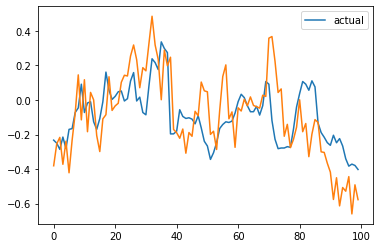

In [92]:
predictions = model(testDataX)
plt.plot(testDataY[:100].asnumpy(), label = 'actual')
plt.plot(predictions[:100].asnumpy())
plt.legend()


In [93]:
testDataX2 = testDataX.copy()
y_pred2 = []

for i in range(len(testDataX2)):
    data = testDataX2[i]
    shape = data.shape
    shape = (1, ) + shape
    y = model(data.reshape(*shape))
    y_pred2.append(y.reshape(1).asscalar())
    for j in range(1, np.min([hrs, len(testDataX2) - i - 1]) + 1):
        testDataX2[i + j][-j][0] = y.reshape(1)

y_pred2 = np.array(y_pred2)

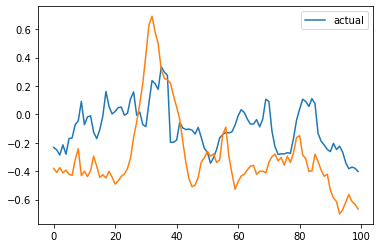

In [95]:
plt.plot(testDataY[0:100].asnumpy(), label = 'actual')
plt.plot(y_pred2[0:100])
plt.legend()
plt.savefig('gru_prediction_100.png')